In [125]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
%matplotlib inline
#Source for embed_limit line = https://matplotlib.org/api/_as_gen/matplotlib.animation.Animation.html
animation.rcParams['animation.embed_limit'] = 1000
animation.rcParams.keys() #Check to see if embed_limit actually changed

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 1000.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'k',
          'axes.facecolor': 'w',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axe

In [31]:
'''
Variables Key

m1 = mass of planet 1 
m2 = mass of planet 2
msun = mass of sun
r12 = distance between planet 1 and planet 2
rsun_1 = distance between planet 1 and the sun
rsun_2 = distance between planet 2 and the sun
theta2_sine_p1 = sine of the angle from planet 1 to planet 2
theta2_cosine_p1 = cosine of the angle from planet 1 to planet 2
theta2_sine_p2 = sine of the angle from planet 2 to planet 1
theta2_cosine_p2 = cosine of the angle from planet 2 to planet 1
thetasun_sine_p1 = sine of the angle from planet 1 to the sun
thetasun_cosine_p1 = cosine of the angle from planet 1 to the sun
thetasun_sine_p2 = sine of the angle from planet 2 to the sun
thetasun_cosine_p2 = cosine of the angle from planet 2 to the sun
dt = time step increment
v0x_1 = initial velcity of planet 1 in the x direction
v0y_1 = initial velcity of planet 1 in the y direction
v0x_2 = initial velcity of planet 2 in the x direction
v0y_2 = initial velcity of planet 2 in the y direction
p1_pos = list value: [x position of planet 1, y position of planet 1]
p2_pos = list value: [x position of planet 2, y position of planet 2]
'''
print() #so entire comment isn't printed

In [32]:
#Function retruns key values for planet 1
def planet_1(m1,m2,msun,r12,rsun,theta2_sine,theta2_cosine,thetasun_sine,thetasun_cosine,dt,v0x,v0y):
    def gravity_sun(msun,m1,rsun): #Force of sun on planet 1
        #Source for G value: https://physics.nist.gov/cgi-bin/cuu/Value?bg
        G = 6.67430*(10**-11)
        return(-G*msun*m1/(rsun**2))
    def gravity_m2(m2,m1,r12): #Force of planet 2 on planet 1
        #Source for G value: https://physics.nist.gov/cgi-bin/cuu/Value?bg
        G = 6.67430*(10**-11)
        return(-G*m2*m1/(r12**2))
    def fx(m1,m2,msun,r12,rsun,thetasun_sine,thetasun_cosine,theta2_sine,theta2_cosine): #Net force in x direction
        gsun = gravity_sun(msun,m1,rsun)
        gm2 = gravity_m2(m2,m1,r12)
        return(thetasun_cosine*gsun + theta2_sine*gm2)
    def fy(m1,m2,msun,r12,rsun,thetasun_sine,thetasun_cosine,theta2_sine,theta2_cosine): #Net force in y direction
        gsun = gravity_sun(msun,m1,rsun)
        gm2 = gravity_m2(m2,m1,r12)
        return((thetasun_sine)*gsun + theta2_cosine*gm2)
    def ax(m1,m2,msun,r12,rsun,thetasun_sine,thetasun_cosine,theta2_sine,theta2_cosine): #accel. in x direction
        return(fx(m1,m2,msun,r12,rsun,thetasun_sine,thetasun_cosine,theta2_sine,theta2_cosine)/m1)
    def ay(m1,m2,msun,r12,rsun,thetasun_sine,thetasun_cosine,theta2_sine,theta2_cosine): #accel. in y direction
        return(fy(m1,m2,msun,r12,rsun,thetasun_sine,thetasun_cosine,theta2_sine,theta2_cosine)/m1)
    def vx(m1,m2,msun,r12,rsun,thetasun_sine,thetasun_cosine,theta2_sine,theta2_cosine,dt,v0x): #update v in x
        return(ax(m1,m2,msun,r12,rsun,thetasun_sine,thetasun_cosine,theta2_sine,theta2_cosine)*dt+v0x)
    def vy(m1,m2,msun,r12,rsun,thetasun_sine,thetasun_cosine,theta2_sine,theta2_cosine,dt,v0y): #update v in y
        return(ay(m1,m2,msun,r12,rsun,thetasun_sine,thetasun_cosine,theta2_sine,theta2_cosine)*dt+v0y)
    return(gravity_sun(msun,m1,rsun),gravity_m2(m2,m1,r12),fx(m1,m2,msun,r12,rsun,thetasun_sine,thetasun_cosine,theta2_sine,theta2_cosine),
          fy(m1,m2,msun,r12,rsun,thetasun_sine,thetasun_cosine,theta2_sine,theta2_cosine),ax(m1,m2,msun,r12,rsun,thetasun_sine,thetasun_cosine,theta2_sine,theta2_cosine),
          ay(m1,m2,msun,r12,rsun,thetasun_sine,thetasun_cosine,theta2_sine,theta2_cosine),vx(m1,m2,msun,r12,rsun,thetasun_sine,thetasun_cosine,theta2_sine,theta2_cosine,dt,v0x),
          vy(m1,m2,msun,r12,rsun,thetasun_sine,thetasun_cosine,theta2_sine,theta2_cosine,dt,v0y))
    

In [33]:
#Function retruns key values for planet 2
def planet_2(m1,m2,msun,r12,rsun,theta2_sine,theta2_cosine,thetasun_sine,thetasun_cosine,dt,v0x,v0y):
    def gravity_sun(msun,m2,rsun): #Force of sun on planet 2
        #Source for G value: https://physics.nist.gov/cgi-bin/cuu/Value?bg
        G = 6.67430*(10**-11)
        return(-G*msun*m2/(rsun**2))
    def gravity_m1(m1,m2,r12): #Force of planet 1 on planet 2
        #Source for G value: https://physics.nist.gov/cgi-bin/cuu/Value?bg
        G = 6.67430*(10**-11)
        return(-G*m1*m2/(r12**2))
    def fx(m1,m2,msun,r1,rsun,thetasun_sine,thetasun_cosine,theta2_sine,theta2_cosine): #Net force in x direction
        gsun = gravity_sun(msun,m2,rsun)
        gm2 = gravity_m1(m1,m2,r12)
        return(thetasun_cosine*gsun + theta2_sine*gm2)
    def fy(m1,m2,msun,r12,rsun,thetasun_sine,thetasun_cosine,theta2_sine,theta2_cosine): #Net force in y direction
        gsun = gravity_sun(msun,m2,rsun)
        gm2 = gravity_m1(m1,m2,r12)
        return(thetasun_sine*gsun + theta2_cosine*gm2)
    def ax(m1,m2,msun,r12,rsun,thetasun_sine,thetasun_cosine,theta2_sine,theta2_cosine): #accel. in x direction
        return(fx(m1,m2,msun,r12,rsun,thetasun_sine,thetasun_cosine,theta2_sine,theta2_cosine)/m2)
    def ay(m1,m2,msun,r12,rsun,thetasun_sine,thetasun_cosine,theta2_sine,theta2_cosine): #accel. in y direction
        return(fy(m1,m2,msun,r12,rsun,thetasun_sine,thetasun_cosine,theta2_sine,theta2_cosine)/m2)
    def vx(m1,m2,msun,r12,rsun,thetasun_sine,thetasun_cosine,theta2_sine,theta2_cosine,dt,v0x): #update v in x
        return(ax(m1,m2,msun,r12,rsun,thetasun_sine,thetasun_cosine,theta2_sine,theta2_cosine)*dt+v0x)
    def vy(m1,m2,msun,r12,rsun,thetasun_sine,thetasun_cosine,theta2_sine,theta2_cosine,dt,v0y): #update v in y
        return(ay(m1,m2,msun,r12,rsun,thetasun_sine,thetasun_cosine,theta2_sine,theta2_cosine)*dt+v0y)
    return(gravity_sun(msun,m2,rsun),gravity_m1(m2,m1,r12),fx(m1,m2,msun,r12,rsun,thetasun_sine,thetasun_cosine,theta2_sine,theta2_cosine),
          fy(m1,m2,msun,r12,rsun,thetasun_sine,thetasun_cosine,theta2_sine,theta2_cosine),ax(m1,m2,msun,r12,rsun,thetasun_sine,thetasun_cosine,theta2_sine,theta2_cosine),
          ay(m1,m2,msun,r12,rsun,thetasun_sine,thetasun_cosine,theta2_sine,theta2_cosine),vx(m1,m2,msun,r12,rsun,thetasun_sine,thetasun_cosine,theta2_sine,theta2_cosine,dt,v0x),
          vy(m1,m2,msun,r12,rsun,thetasun_sine,thetasun_cosine,theta2_sine,theta2_cosine,dt,v0y))
    

In [38]:
#Mars, Earth, and the Sun

In [39]:
#Function that takes no inputs and returns desired inital values

#All values for planets in our solar system are from https://nssdc.gsfc.nasa.gov/planetary/factsheet/
#Values for the Sun are from https://nssdc.gsfc.nasa.gov/planetary/factsheet/sunfact.html

#This is for Mars and Earth orbiting the Sun
def initial_parameters_p1_p2():
    
    i = 5000 #Number of iterations
    
    p1_pos = [0,149.6*(10**9)] #Position of planet 1
    p2_pos = [0,-227.9*(10**9)] #Position of planet 2
    m1 = 5.97*(10**24) #Mass of planet 1
    m2 = 0.642*(10**24) #Mass of planet 2
    msun = 1988500*(10**24) #Mass of sun

    x12 = p1_pos[0]-p2_pos[0] #Calculate x distance between planet 1 and planet 2
    y12 = p1_pos[1]-p2_pos[1] #Calculate y distance between planet 1 and planet 2
    #Note sun is defined to be at (0,0)
    rsun_1 = np.sqrt((p1_pos[0]**2) + (p1_pos[1]**2)) #Calculate distance frm planet 1 to sun 
    rsun_2 = np.sqrt((p2_pos[0]**2) + (p2_pos[1]**2)) #Calculate distance frm planet 1 to sun
    r12 = np.sqrt((x12**2)+(y12**2)) #Calculate distance frm planet 1 to planet 2

    #Define inital values for each trig value (see "Variables Key" for more details)
    thetasun_sine_p1 = 1
    thetasun_cosine_p1 = 0
    thetasun_sine_p2 = 1
    thetasun_cosine_p2 = 0
    theta2_sine_p1 = 0
    theta2_cosine_p1 = 1
    theta2_sine_p2 = 0
    theta2_cosine_p2 = 1
    
    #Define dt (see "Variables Key" for more details)
    dt = 687*24*60*60/i

    #Set intial velocities (see "Variables Key" for more details)
    v0y_1 = 0
    v0x_1 = 29.8*(10**3)
    v0y_2 = 0
    v0x_2 = -24.1*(10**3)

    return(i,p1_pos,p2_pos,m1,m2,msun,r12,rsun_1,rsun_2,theta2_sine_p1,theta2_cosine_p1,theta2_sine_p2,theta2_cosine_p2
           ,thetasun_sine_p1,thetasun_cosine_p1,thetasun_sine_p2,thetasun_cosine_p2,dt,v0x_1,v0y_1,v0x_2,v0y_2)

In [54]:
#Call inital parameters function to set initial parameters
i,p1_pos,p2_pos,m1,m2,msun,r12,rsun_1,rsun_2,theta2_sine_p1,theta2_cosine_p1,theta2_sine_p2,theta2_cosine_p2,thetasun_sine_p1,thetasun_cosine_p1,thetasun_sine_p2,thetasun_cosine_p2,dt,v0x_1,v0y_1,v0x_2,v0y_2 = initial_parameters_p1_p2()

#Function to update position of the planets
def pos_update(p1_pos,p2_pos,m1,m2,msun,r12,rsun_1,rsun_2,theta2_sine_p1,theta2_cosine_p1,theta2_sine_p2,theta2_cosine_p2
    ,thetasun_sine_p1,thetasun_cosine_p1,thetasun_sine_p2,
    thetasun_cosine_p2,dt,v0x_1,v0y_1,v0x_2,v0y_2):
    
    #Call both nested function suites to get key values for planets 1 and 2
    sun_on_p1, p2_on_p1, net_f_x_1, net_f_y_1, ax_1, ay_1, vx_1, vy_1 = planet_1(m1,m2,msun,r12,rsun_1,theta2_sine_p1,theta2_cosine_p1,thetasun_sine_p1,thetasun_cosine_p1,dt,v0x_1,v0y_1)
    sun_on_p2, p1_on_p2, net_f_x_2, net_f_y_2, ax_2, ay_2, vx_2, vy_2 = planet_2(m1,m2,msun,r12,rsun_2,theta2_sine_p2,theta2_cosine_p2,thetasun_sine_p2,thetasun_cosine_p2,dt,v0x_2,v0y_2)
    
    #Update position of planets 1 and 2
    p1_pos[0] = p1_pos[0] + vx_1*dt + 0.5*ax_1*(dt**2)
    p1_pos[1] = p1_pos[1] + vy_1*dt + 0.5*ay_1*(dt**2)
    p2_pos[0] = p2_pos[0] + vx_2*dt + 0.5*ax_2*(dt**2)
    p2_pos[1] = p2_pos[1] + vy_2*dt + 0.5*ay_2*(dt**2)

    #update velocities
    v0x_1 = v0x_1 + ax_1*dt
    v0y_1 = v0y_1 + ay_1*dt
    v0x_2 = v0x_2 + ax_2*dt
    v0y_2 = v0y_2 + ay_2*dt
    
    #update distances
    rsun_1 = np.sqrt((p1_pos[0])**2 + (p1_pos[1])**2)
    rsun_2 = np.sqrt((p2_pos[0])**2 + (p2_pos[1])**2)
    r12 = np.sqrt((p1_pos[0]-p2_pos[0])**2 + (p1_pos[1]-p2_pos[1])**2)

    #update angles
    
    theta2_sine_p1 = (p1_pos[0]-p2_pos[0])/r12
    theta2_cosine_p1 = (p1_pos[1]-p2_pos[1])/r12
    theta2_sine_p2 = (p2_pos[0]-p1_pos[0])/r12
    theta2_cosine_p2 = (p2_pos[1]-p1_pos[1])/r12
    
    thetasun_sine_p1 = p1_pos[1]/rsun_1
    thetasun_cosine_p1 = p1_pos[0]/rsun_1
    thetasun_sine_p2 = p2_pos[1]/rsun_2
    thetasun_cosine_p2 = p2_pos[0]/rsun_2

    return(p1_pos,p2_pos,theta2_sine_p1,theta2_cosine_p1,theta2_sine_p2,theta2_cosine_p2,
           thetasun_sine_p1,thetasun_cosine_p1,thetasun_sine_p2,thetasun_cosine_p2,
           v0x_1,v0y_1,v0x_2,v0y_2,ay_1,ay_2,r12,rsun_1,rsun_2,ax_1,ax_2,p1_on_p2,net_f_x_1,thetasun_sine_p1,
           thetasun_cosine_p1,sun_on_p1,net_f_y_1,ay_1)


In [55]:
#Again call initial parameters
i,p1_pos,p2_pos,m1,m2,msun,r12,rsun_1,rsun_2,theta2_sine_p1,theta2_cosine_p1,theta2_sine_p2,theta2_cosine_p2,thetasun_sine_p1,thetasun_cosine_p1,thetasun_sine_p2,thetasun_cosine_p2,dt,v0x_1,v0y_1,v0x_2,v0y_2 = initial_parameters_p1_p2()

#Initialize lists to hold x and y coordinates for planets 1 and 2
x_1 = [] #planet 1 x coords
y_1 = [] #planet 1 y coords
x_2 = [] #planet 2 x coords
y_2 = [] #planet 2 y coords

#Iterate i number of iterations to populate initialized lists
for a in range(i):
    
    #Call defined pos_update function to update position of planets 1 and 2 every iteration
    p1_pos,p2_pos,theta2_sine_p1,theta2_cosine_p1,theta2_sine_p2,theta2_cosine_p2,thetasun_sine_p1,thetasun_cosine_p1,thetasun_sine_p2,thetasun_cosine_p2,v0x_1,v0y_1,v0x_2,v0y_2,ay_1,ay_2,r12,rsun_1,rsun_2,ax_1,ax_2,p1_on_p2,net_f_x_1,sine,cosine,sun_on_p1,net_f_y_1,ay_1 = pos_update(p1_pos,p2_pos,m1,m2,msun,r12,rsun_1,rsun_2,theta2_sine_p1,theta2_cosine_p1,theta2_sine_p2,theta2_cosine_p2,thetasun_sine_p1,thetasun_cosine_p1,thetasun_sine_p2,thetasun_cosine_p2,dt,v0x_1,v0y_1,v0x_2,v0y_2)        
    
    x_1.append(p1_pos[0])
    x_2.append(p2_pos[0])
    y_1.append(p1_pos[1])
    y_2.append(p2_pos[1])
    

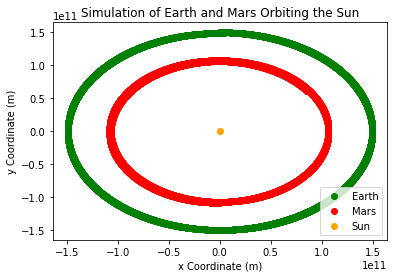

In [56]:
#Plot a scatter plot with labels and legend to show smulation results
plt.scatter(x_1,y_1,color = 'g',label = 'Earth')
plt.scatter(x_2,y_2,color = 'r',label = 'Mars')
plt.scatter(0,0,color = 'orange',label = 'Sun')
plt.title('Simulation of Earth and Mars Orbiting the Sun')
plt.ylabel('y Coordinate (m)')
plt.xlabel('x Coordinate (m)')
plt.legend(loc = 'lower right')
plt.show()

In [57]:
#Note that the next few cells are inspired by Workshop 4 which had focused on animation with python
#Also note that this next block of four cells could be placed after the scatter plot for any of the
#following scenarios and rand and should give an animation
#For the sake of this notebook, no animations wil be given and the cells should not be run unless
#with low number of iterations. This low iteration animation will suffer from the rounding error
#alluded to in the presentation. 
#Many iterations can be ran however the animation will take anywhere between 15 to 30 minutes to complete
fig, ax = plt.subplots()
ax.set_xscale('linear')
ax.set_yscale('linear')
plt.close(fig)

In [58]:
def anim_p1(i):
    pos_p1 = ax.scatter(x_1[i],y_1[i])
    pos_p2 = ax.scatter(x_2[i],y_2[i])
    return(pos_p1,pos_p2)

In [59]:
animation_p1 = animation.FuncAnimation(fig,anim_p1, frames = len(x_1)-1, blit = False)

In [60]:
i,p1_pos,p2_pos,m1,m2,msun,r12,rsun_1,rsun_2,theta2_sine_p1,theta2_cosine_p1,theta2_sine_p2,theta2_cosine_p2,thetasun_sine_p1,thetasun_cosine_p1,thetasun_sine_p2,thetasun_cosine_p2,dt,v0x_1,v0y_1,v0x_2,v0y_2 = initial_parameters_p1_p2()
HTML(animation_p1.to_jshtml())

KeyboardInterrupt: 

In [61]:
#Venus, Earth, and the Sun

In [62]:
#Function that takes no inputs and returns desired inital values

#All values for planets in our solar system are from https://nssdc.gsfc.nasa.gov/planetary/factsheet/
#Values for the Sun are from https://nssdc.gsfc.nasa.gov/planetary/factsheet/sunfact.html

#This is for Venus and Earth orbiting the Sun
def initial_parameters_p1_p2():
    
    i = 5000 #Number of iterations
    
    p1_pos = [0,149.6*(10**9)] #Position of planet 1
    p2_pos = [0,-108.2*(10**9)] #Position of planet 2
    m1 = 5.97*(10**24) #Mass of planet 1
    m2 = 4.87*(10**24) #Mass of planet 2
    msun = 1988500*(10**24) #Mass of sun

    x12 = p1_pos[0]-p2_pos[0] #Calculate x distance between planet 1 and planet 2
    y12 = p1_pos[1]-p2_pos[1] #Calculate y distance between planet 1 and planet 2
    #Note sun is defined to be at (0,0)
    rsun_1 = np.sqrt((p1_pos[0]**2) + (p1_pos[1]**2)) #Calculate distance frm planet 1 to sun 
    rsun_2 = np.sqrt((p2_pos[0]**2) + (p2_pos[1]**2)) #Calculate distance frm planet 1 to sun
    r12 = np.sqrt((x12**2)+(y12**2)) #Calculate distance frm planet 1 to planet 2

    #Define inital values for each trig value (see "Variables Key" for more details)
    thetasun_sine_p1 = 1
    thetasun_cosine_p1 = 0
    thetasun_sine_p2 = 1
    thetasun_cosine_p2 = 0
    theta2_sine_p1 = 0
    theta2_cosine_p1 = 1
    theta2_sine_p2 = 0
    theta2_cosine_p2 = 1
    
    #Define dt (see "Variables Key" for more details)
    dt = 365.2*24*60*60/i

    #Set intial velocities (see "Variables Key" for more details)
    v0y_1 = 0
    v0x_1 = 29.8*(10**3)
    v0y_2 = 0
    v0x_2 = -35*(10**3)
    return(i,p1_pos,p2_pos,m1,m2,msun,r12,rsun_1,rsun_2,theta2_sine_p1,theta2_cosine_p1,theta2_sine_p2,theta2_cosine_p2
           ,thetasun_sine_p1,thetasun_cosine_p1,thetasun_sine_p2,thetasun_cosine_p2,dt,v0x_1,v0y_1,v0x_2,v0y_2)

In [63]:
#Again call initial parameters
i,p1_pos,p2_pos,m1,m2,msun,r12,rsun_1,rsun_2,theta2_sine_p1,theta2_cosine_p1,theta2_sine_p2,theta2_cosine_p2,thetasun_sine_p1,thetasun_cosine_p1,thetasun_sine_p2,thetasun_cosine_p2,dt,v0x_1,v0y_1,v0x_2,v0y_2 = initial_parameters_p1_p2()

#Initialize lists to hold x and y coordinates for planets 1 and 2
x_1 = [] #planet 1 x coords
y_1 = [] #planet 1 y coords
x_2 = [] #planet 2 x coords
y_2 = [] #planet 2 y coords

#Iterate i number of iterations to populate initialized lists
for a in range(i):
    
    #Call defined pos_update function to update position of planets 1 and 2 every iteration
    p1_pos,p2_pos,theta2_sine_p1,theta2_cosine_p1,theta2_sine_p2,theta2_cosine_p2,thetasun_sine_p1,thetasun_cosine_p1,thetasun_sine_p2,thetasun_cosine_p2,v0x_1,v0y_1,v0x_2,v0y_2,ay_1,ay_2,r12,rsun_1,rsun_2,ax_1,ax_2,p1_on_p2,net_f_x_1,sine,cosine,sun_on_p1,net_f_y_1,ay_1 = pos_update(p1_pos,p2_pos,m1,m2,msun,r12,rsun_1,rsun_2,theta2_sine_p1,theta2_cosine_p1,theta2_sine_p2,theta2_cosine_p2,thetasun_sine_p1,thetasun_cosine_p1,thetasun_sine_p2,thetasun_cosine_p2,dt,v0x_1,v0y_1,v0x_2,v0y_2)        
    
    x_1.append(p1_pos[0])
    x_2.append(p2_pos[0])
    y_1.append(p1_pos[1])
    y_2.append(p2_pos[1])
    

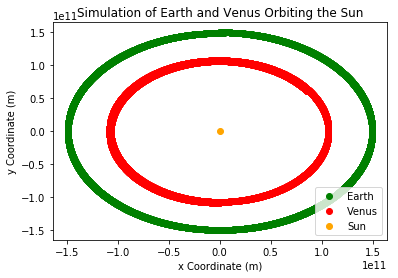

In [64]:
#Plot a scatter plot with labels and legend to show smulation results
plt.scatter(x_1,y_1,color = 'g',label = 'Earth')
plt.scatter(x_2,y_2,color = 'r',label = 'Venus')
plt.scatter(0,0,color = 'orange',label = 'Sun')
plt.title('Simulation of Earth and Venus Orbiting the Sun')
plt.ylabel('y Coordinate (m)')
plt.xlabel('x Coordinate (m)')
plt.legend(loc = 'lower right')
plt.show()

In [70]:
#Rounding Error 400 Iterations Venus, Earth, and the Sun

In [71]:
#Again call initial parameters
i,p1_pos,p2_pos,m1,m2,msun,r12,rsun_1,rsun_2,theta2_sine_p1,theta2_cosine_p1,theta2_sine_p2,theta2_cosine_p2,thetasun_sine_p1,thetasun_cosine_p1,thetasun_sine_p2,thetasun_cosine_p2,dt,v0x_1,v0y_1,v0x_2,v0y_2 = initial_parameters_p1_p2()
dt = dt*i/400 #Manually correcting dt for new i
i = 400 #Manual overide of number of iterations

#Initialize lists to hold x and y coordinates for planets 1 and 2
x_1 = [] #planet 1 x coords
y_1 = [] #planet 1 y coords
x_2 = [] #planet 2 x coords
y_2 = [] #planet 2 y coords

#Iterate i number of iterations to populate initialized lists
for a in range(i):
    
    #Call defined pos_update function to update position of planets 1 and 2 every iteration
    p1_pos,p2_pos,theta2_sine_p1,theta2_cosine_p1,theta2_sine_p2,theta2_cosine_p2,thetasun_sine_p1,thetasun_cosine_p1,thetasun_sine_p2,thetasun_cosine_p2,v0x_1,v0y_1,v0x_2,v0y_2,ay_1,ay_2,r12,rsun_1,rsun_2,ax_1,ax_2,p1_on_p2,net_f_x_1,sine,cosine,sun_on_p1,net_f_y_1,ay_1 = pos_update(p1_pos,p2_pos,m1,m2,msun,r12,rsun_1,rsun_2,theta2_sine_p1,theta2_cosine_p1,theta2_sine_p2,theta2_cosine_p2,thetasun_sine_p1,thetasun_cosine_p1,thetasun_sine_p2,thetasun_cosine_p2,dt,v0x_1,v0y_1,v0x_2,v0y_2)        
    
    x_1.append(p1_pos[0])
    x_2.append(p2_pos[0])
    y_1.append(p1_pos[1])
    y_2.append(p2_pos[1])
    

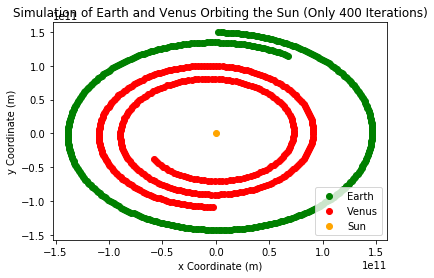

In [72]:
#Plot a scatter plot with labels and legend to show smulation results
plt.scatter(x_1,y_1,color = 'g',label = 'Earth')
plt.scatter(x_2,y_2,color = 'r',label = 'Venus')
plt.scatter(0,0,color = 'orange',label = 'Sun')
plt.title('Simulation of Earth and Venus Orbiting the Sun (Only 400 Iterations)')
plt.ylabel('y Coordinate (m)')
plt.xlabel('x Coordinate (m)')
plt.legend(loc = 'lower right')
plt.show()

In [ ]:
#Venus, Earth, and the Sun but with Venus mass times 10^3

In [79]:
#Function that takes no inputs and returns desired inital values

#All values for planets in our solar system are from https://nssdc.gsfc.nasa.gov/planetary/factsheet/
#Values for the Sun are from https://nssdc.gsfc.nasa.gov/planetary/factsheet/sunfact.html

#This is for Venus and Earth orbiting the Sun with Venus mass x 10^3
def initial_parameters_p1_p2():
    
    i = 10000 #Number of iterations
    
    p1_pos = [0,149.6*(10**9)] #Position of planet 1
    p2_pos = [0,-108.2*(10**9)] #Position of planet 2
    m1 = 5.97*(10**24) #Mass of planet 1
    m2 = 4.87*(10**28) #Mass of planet 2
    msun = 1988500*(10**24) #Mass of sun

    x12 = p1_pos[0]-p2_pos[0] #Calculate x distance between planet 1 and planet 2
    y12 = p1_pos[1]-p2_pos[1] #Calculate y distance between planet 1 and planet 2
    #Note sun is defined to be at (0,0)
    rsun_1 = np.sqrt((p1_pos[0]**2) + (p1_pos[1]**2)) #Calculate distance frm planet 1 to sun 
    rsun_2 = np.sqrt((p2_pos[0]**2) + (p2_pos[1]**2)) #Calculate distance frm planet 1 to sun
    r12 = np.sqrt((x12**2)+(y12**2)) #Calculate distance frm planet 1 to planet 2

    #Define inital values for each trig value (see "Variables Key" for more details)
    thetasun_sine_p1 = 1
    thetasun_cosine_p1 = 0
    thetasun_sine_p2 = 1
    thetasun_cosine_p2 = 0
    theta2_sine_p1 = 0
    theta2_cosine_p1 = 1
    theta2_sine_p2 = 0
    theta2_cosine_p2 = 1
    
    #Define dt (see "Variables Key" for more details)
    dt = 365.2*24*60*60/i

    #Set intial velocities (see "Variables Key" for more details)
    v0y_1 = 0
    v0x_1 = 29.8*(10**3)
    v0y_2 = 0
    v0x_2 = -35*(10**3)
    return(i,p1_pos,p2_pos,m1,m2,msun,r12,rsun_1,rsun_2,theta2_sine_p1,theta2_cosine_p1,theta2_sine_p2,theta2_cosine_p2
           ,thetasun_sine_p1,thetasun_cosine_p1,thetasun_sine_p2,thetasun_cosine_p2,dt,v0x_1,v0y_1,v0x_2,v0y_2)

In [80]:
#Again call initial parameters
i,p1_pos,p2_pos,m1,m2,msun,r12,rsun_1,rsun_2,theta2_sine_p1,theta2_cosine_p1,theta2_sine_p2,theta2_cosine_p2,thetasun_sine_p1,thetasun_cosine_p1,thetasun_sine_p2,thetasun_cosine_p2,dt,v0x_1,v0y_1,v0x_2,v0y_2 = initial_parameters_p1_p2()

#Initialize lists to hold x and y coordinates for planets 1 and 2
x_1 = [] #planet 1 x coords
y_1 = [] #planet 1 y coords
x_2 = [] #planet 2 x coords
y_2 = [] #planet 2 y coords

#Iterate i number of iterations to populate initialized lists
for a in range(i):
    
    #Call defined pos_update function to update position of planets 1 and 2 every iteration
    p1_pos,p2_pos,theta2_sine_p1,theta2_cosine_p1,theta2_sine_p2,theta2_cosine_p2,thetasun_sine_p1,thetasun_cosine_p1,thetasun_sine_p2,thetasun_cosine_p2,v0x_1,v0y_1,v0x_2,v0y_2,ay_1,ay_2,r12,rsun_1,rsun_2,ax_1,ax_2,p1_on_p2,net_f_x_1,sine,cosine,sun_on_p1,net_f_y_1,ay_1 = pos_update(p1_pos,p2_pos,m1,m2,msun,r12,rsun_1,rsun_2,theta2_sine_p1,theta2_cosine_p1,theta2_sine_p2,theta2_cosine_p2,thetasun_sine_p1,thetasun_cosine_p1,thetasun_sine_p2,thetasun_cosine_p2,dt,v0x_1,v0y_1,v0x_2,v0y_2)        
    
    x_1.append(p1_pos[0])
    x_2.append(p2_pos[0])
    y_1.append(p1_pos[1])
    y_2.append(p2_pos[1])
    

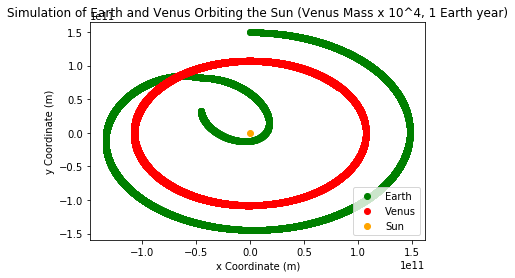

In [81]:
#Plot a scatter plot with labels and legend to show smulation results
plt.scatter(x_1,y_1,color = 'g',label = 'Earth')
plt.scatter(x_2,y_2,color = 'r',label = 'Venus')
plt.scatter(0,0,color = 'orange',label = 'Sun')
plt.title('Simulation of Earth and Venus Orbiting the Sun (Venus Mass x 10^4, 1 Earth year)')
plt.ylabel('y Coordinate (m)')
plt.xlabel('x Coordinate (m)')
plt.legend(loc = 'lower right')
plt.show()

In [82]:
#Planetary Oscillator (Two Suns and Earth)

In [99]:
#Function that takes no inputs and returns desired inital values

#All values for planets in our solar system are from https://nssdc.gsfc.nasa.gov/planetary/factsheet/
#Values for the Sun are from https://nssdc.gsfc.nasa.gov/planetary/factsheet/sunfact.html

#This is for Planetary Oscillator
#In this case planet 2 is a second stationary sun
def initial_parameters_p1_p2():
    
    i = 1000000 #Number of iterations
    
    p1_pos = [0,149.6*(10**9)] #Position of planet 1
    p2_pos = [0,2*149.6*(10**9)] #Position of planet 2
    m1 = 5.97*(10**24) #Mass of planet 1
    m2 = 1988500*(10**24) #Mass of planet 2
    msun = 1988500*(10**24) #Mass of sun

    x12 = p1_pos[0]-p2_pos[0] #Calculate x distance between planet 1 and planet 2
    y12 = p1_pos[1]-p2_pos[1] #Calculate y distance between planet 1 and planet 2
    #Note sun is defined to be at (0,0)
    rsun_1 = np.sqrt((p1_pos[0]**2) + (p1_pos[1]**2)) #Calculate distance frm planet 1 to sun 
    rsun_2 = np.sqrt((p2_pos[0]**2) + (p2_pos[1]**2)) #Calculate distance frm planet 1 to sun
    r12 = np.sqrt((x12**2)+(y12**2)) #Calculate distance frm planet 1 to planet 2

    #Define inital values for each trig value (see "Variables Key" for more details)
    thetasun_sine_p1 = 1
    thetasun_cosine_p1 = 0
    thetasun_sine_p2 = 1
    thetasun_cosine_p2 = 0
    theta2_sine_p1 = 0
    theta2_cosine_p1 = 1
    theta2_sine_p2 = 0
    theta2_cosine_p2 = 1
    
    #Define dt (see "Variables Key" for more details)
    dt = 365.2*24*60*60/i

    #Set intial velocities (see "Variables Key" for more details)
    v0y_1 = 0
    v0x_1 = 29.8*(10**3)
    v0y_2 = 0
    v0x_2 = 0
    return(i,p1_pos,p2_pos,m1,m2,msun,r12,rsun_1,rsun_2,theta2_sine_p1,theta2_cosine_p1,theta2_sine_p2,theta2_cosine_p2
           ,thetasun_sine_p1,thetasun_cosine_p1,thetasun_sine_p2,thetasun_cosine_p2,dt,v0x_1,v0y_1,v0x_2,v0y_2)

In [100]:
#Change pos_update function to make planet 2 (the second sun) not move

#Call inital parameters function to set initial parameters
i,p1_pos,p2_pos,m1,m2,msun,r12,rsun_1,rsun_2,theta2_sine_p1,theta2_cosine_p1,theta2_sine_p2,theta2_cosine_p2,thetasun_sine_p1,thetasun_cosine_p1,thetasun_sine_p2,thetasun_cosine_p2,dt,v0x_1,v0y_1,v0x_2,v0y_2 = initial_parameters_p1_p2()

#Function to update position of the planets
def pos_update(p1_pos,p2_pos,m1,m2,msun,r12,rsun_1,rsun_2,theta2_sine_p1,theta2_cosine_p1,theta2_sine_p2,theta2_cosine_p2
    ,thetasun_sine_p1,thetasun_cosine_p1,thetasun_sine_p2,
    thetasun_cosine_p2,dt,v0x_1,v0y_1,v0x_2,v0y_2):
    
    #Call both nested function suites to get key values for planets 1 and 2
    sun_on_p1, p2_on_p1, net_f_x_1, net_f_y_1, ax_1, ay_1, vx_1, vy_1 = planet_1(m1,m2,msun,r12,rsun_1,theta2_sine_p1,theta2_cosine_p1,thetasun_sine_p1,thetasun_cosine_p1,dt,v0x_1,v0y_1)
    sun_on_p2, p1_on_p2, net_f_x_2, net_f_y_2, ax_2, ay_2, vx_2, vy_2 = planet_2(m1,m2,msun,r12,rsun_2,theta2_sine_p2,theta2_cosine_p2,thetasun_sine_p2,thetasun_cosine_p2,dt,v0x_2,v0y_2)
    
    #Update position of planets 1 and 2
    p1_pos[0] = p1_pos[0] + vx_1*dt + 0.5*ax_1*(dt**2)
    p1_pos[1] = p1_pos[1] + vy_1*dt + 0.5*ay_1*(dt**2)
    p2_pos[0] = p2_pos[0] 
    p2_pos[1] = p2_pos[1] 

    #update velocities
    v0x_1 = v0x_1 + ax_1*dt
    v0y_1 = v0y_1 + ay_1*dt
#     v0x_2 = v0x_2 + ax_2*dt
#     v0y_2 = v0y_2 + ay_2*dt
    
    #update distances
    rsun_1 = np.sqrt((p1_pos[0])**2 + (p1_pos[1])**2)
    rsun_2 = np.sqrt((p2_pos[0])**2 + (p2_pos[1])**2)
    r12 = np.sqrt((p1_pos[0]-p2_pos[0])**2 + (p1_pos[1]-p2_pos[1])**2)

    #update angles
    
    theta2_sine_p1 = (p1_pos[0]-p2_pos[0])/r12
    theta2_cosine_p1 = (p1_pos[1]-p2_pos[1])/r12
    theta2_sine_p2 = (p2_pos[0]-p1_pos[0])/r12
    theta2_cosine_p2 = (p2_pos[1]-p1_pos[1])/r12
    
    thetasun_sine_p1 = p1_pos[1]/rsun_1
    thetasun_cosine_p1 = p1_pos[0]/rsun_1
    thetasun_sine_p2 = p2_pos[1]/rsun_2
    thetasun_cosine_p2 = p2_pos[0]/rsun_2

    return(p1_pos,p2_pos,theta2_sine_p1,theta2_cosine_p1,theta2_sine_p2,theta2_cosine_p2,
           thetasun_sine_p1,thetasun_cosine_p1,thetasun_sine_p2,thetasun_cosine_p2,
           v0x_1,v0y_1,v0x_2,v0y_2,ay_1,ay_2,r12,rsun_1,rsun_2,ax_1,ax_2,p1_on_p2,net_f_x_1,thetasun_sine_p1,
           thetasun_cosine_p1,sun_on_p1,net_f_y_1,ay_1)


In [101]:
#Again call initial parameters
i,p1_pos,p2_pos,m1,m2,msun,r12,rsun_1,rsun_2,theta2_sine_p1,theta2_cosine_p1,theta2_sine_p2,theta2_cosine_p2,thetasun_sine_p1,thetasun_cosine_p1,thetasun_sine_p2,thetasun_cosine_p2,dt,v0x_1,v0y_1,v0x_2,v0y_2 = initial_parameters_p1_p2()

#Initialize lists to hold x and y coordinates for planets 1 and 2
x_1 = [] #planet 1 x coords
y_1 = [] #planet 1 y coords
x_2 = [] #planet 2 x coords
y_2 = [] #planet 2 y coords

#Iterate i number of iterations to populate initialized lists
for a in range(i):
    
    #Call defined pos_update function to update position of planets 1 and 2 every iteration
    p1_pos,p2_pos,theta2_sine_p1,theta2_cosine_p1,theta2_sine_p2,theta2_cosine_p2,thetasun_sine_p1,thetasun_cosine_p1,thetasun_sine_p2,thetasun_cosine_p2,v0x_1,v0y_1,v0x_2,v0y_2,ay_1,ay_2,r12,rsun_1,rsun_2,ax_1,ax_2,p1_on_p2,net_f_x_1,sine,cosine,sun_on_p1,net_f_y_1,ay_1 = pos_update(p1_pos,p2_pos,m1,m2,msun,r12,rsun_1,rsun_2,theta2_sine_p1,theta2_cosine_p1,theta2_sine_p2,theta2_cosine_p2,thetasun_sine_p1,thetasun_cosine_p1,thetasun_sine_p2,thetasun_cosine_p2,dt,v0x_1,v0y_1,v0x_2,v0y_2)        
    
    x_1.append(p1_pos[0])
    x_2.append(p2_pos[0])
    y_1.append(p1_pos[1])
    y_2.append(p2_pos[1])
    

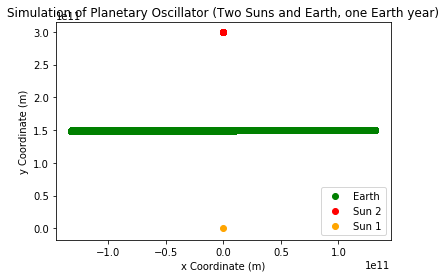

In [102]:
#Plot a scatter plot with labels and legend to show smulation results
plt.scatter(x_1,y_1,color = 'g',label = 'Earth')
plt.scatter(x_2,y_2,color = 'r',label = 'Sun 2')
plt.scatter(0,0,color = 'orange',label = 'Sun 1')
plt.title('Simulation of Planetary Oscillator (Two Suns and Earth, one Earth year)')
plt.ylabel('y Coordinate (m)')
plt.xlabel('x Coordinate (m)')
plt.legend(loc = 'lower right')
plt.show()